In [19]:
import numpy as np
import regex as re
from tensorflow import keras
from sentence_transformers import SentenceTransformer
from transformers import T5ForConditionalGeneration, T5Tokenizer
import faiss
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

In [20]:
file1 = open('Artificial_intelligence_wiki.txt','r')
file2 = open("Artificial_organ.txt","r")
file3 = open("Great_Pyramid_Giza_wiki.txt","r")
file4 = open("List_of_dates_predicted_for_apocalyptic_events_wiki.txt","r")
file5 = open("Psychological_effects_ of _Internet_use_Wikipedia.txt","r") 
Arti_Int_content = file1.read()
Arti_Organ_content = file2.read()
Great_Pyramid_content = file3.read()
List_of_dates_content = file4.read()
Psychological_effects_content = file5.read()
file1.close()
file2.close()
file3.close()
file4.close()
file5.close()

In [21]:
whole_text = Arti_Int_content + Arti_Organ_content + Great_Pyramid_content + List_of_dates_content + Psychological_effects_content

In [22]:
def preprocess_text(text):
    text = re.sub(r'\s+','',text)
    text = re.sub(r'\[[0-9?a-z?A-Z]]','',text)
    return text.lower()

In [23]:
preprocessed_text = preprocess_text(whole_text)

In [24]:
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

In [25]:
chunk_size = 512

In [26]:
def chunk_text(text, chunk_size):
    return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

In [27]:
chunks = chunk_text(preprocessed_text, chunk_size)
chunks = [preprocess_text(chunk) for chunk in chunks]

In [28]:
chunk_embeddings = sentence_model.encode(chunks, show_progress_bar=True,convert_to_numpy=True)

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

In [29]:
index = faiss.IndexFlatL2(chunk_embeddings.shape[1])
index.add(chunk_embeddings)

In [30]:
query = input("Enter your query: ")
query = preprocess_text(query)
query_embedding = sentence_model.encode([query], convert_to_numpy=True)

In [39]:
print(query)

whomadethegreatpyramidofgiza


In [31]:
k = 5 # No of top relevant chunk
cosine_similarity = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k_indices = cosine_similarity.argsort()[-k:][::-1]
# distances, indices = index.search(query_embedding, k)

In [32]:
relevant_chunks = [chunks[i] for i in top_k_indices]
# relevant_chunks = [chunks[i] for i in indices[0]]


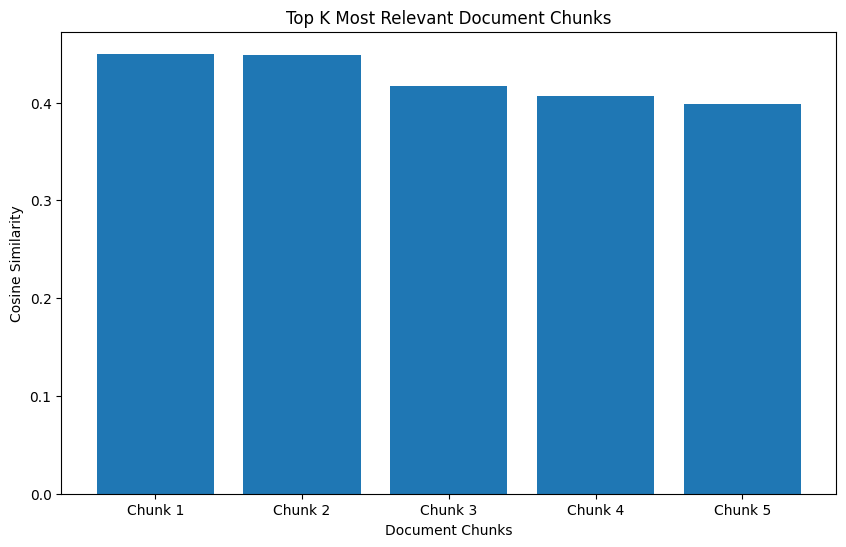

In [33]:
# Plot the cosine similarity scores
plt.figure(figsize=(10, 6))
plt.bar(range(k), [cosine_similarity[i] for i in top_k_indices], tick_label=[f'Chunk {i+1}' for i in range(k)])
plt.xlabel('Document Chunks')
plt.ylabel('Cosine Similarity')
plt.title('Top K Most Relevant Document Chunks')
plt.show()

In [34]:
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small')

In [35]:
input_text = " ".join(relevant_chunks)
input_ids = tokenizer.encode(input_text, return_tensors='pt')
outputs = model.generate(input_ids, num_beams=5, early_stopping=True)
answer = tokenizer.decode(outputs[0],skip_special_tokens=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (1004 > 512). Running this sequence through the model will result in indexing errors


In [36]:
print(answer)

cials and priests so flowrank, local egyptians, gr
